Гронский Дмитрий

Анализ изображений и видео, часть 2

Лабораторная работа №1

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.io

from skimage.segmentation import slic, mark_boundaries
from skimage.filter import gabor_filter
from sklearn.cluster import KMeans
from math import pi

%matplotlib inline

## 1

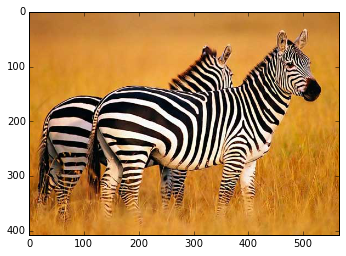

In [21]:
zebra = skimage.io.imread('zebra.jpg')
plt.imshow(zebra)

slic --параметры по умолчанию

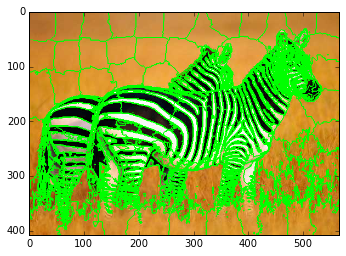

In [22]:
labels = slic(zebra)
plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
plt.show()

## 2

Подбор параметров

n_segments отвечает за число суперпикселей.

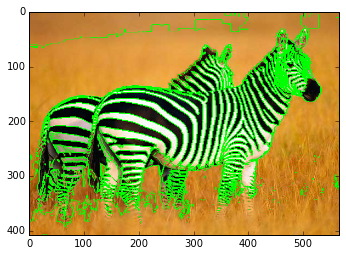

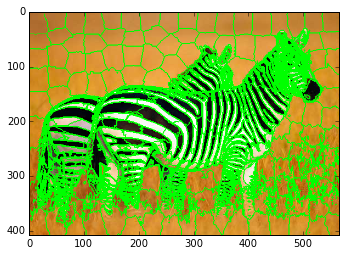

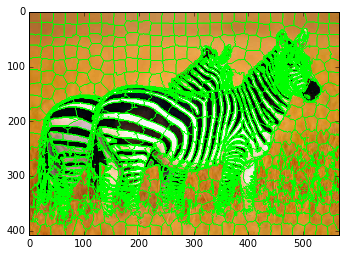

In [26]:
for n in [4, 200, 500]:
    labels = slic(zebra, n_segments=n)
    plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
    plt.show()

compactness определяет вклад пространсвенной близости (по сравнению с цветовой)

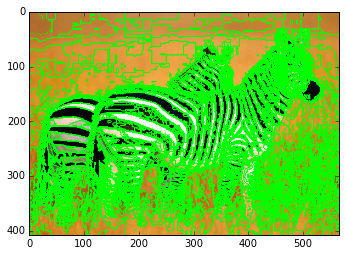

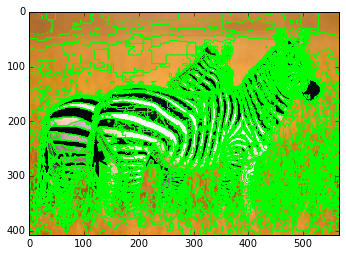

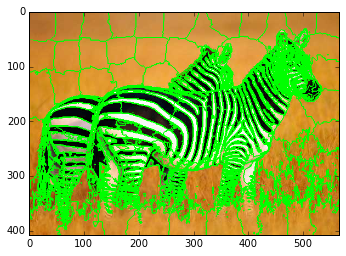

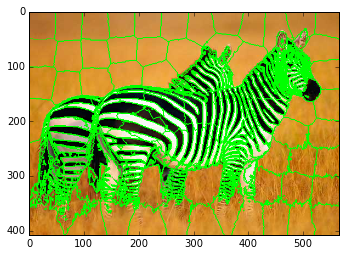

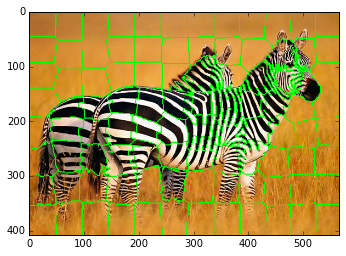

In [28]:
for com in [0.01, 1, 10 ,20, 100]:
    labels = slic(zebra, n_segments=100, compactness=com)
    plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
    plt.show()

Параметр enforce_connectivity определяет, обязательно ли суперпиксели будут связными.

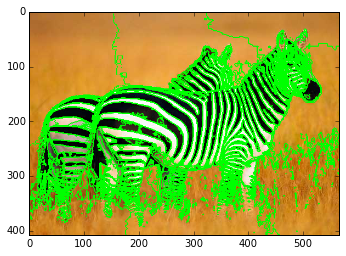

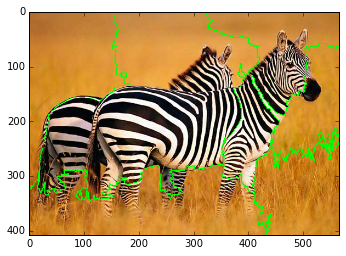

In [30]:
labels = slic(zebra, n_segments=10, enforce_connectivity=False)
plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
plt.show()
labels = slic(zebra, n_segments=10, enforce_connectivity=True)
plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
plt.show()

К изображениб предварительно применяется сглаживание, sigma определяет ширину окна гауссовского фильтра

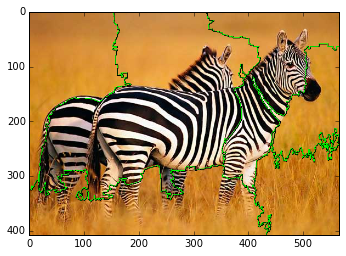

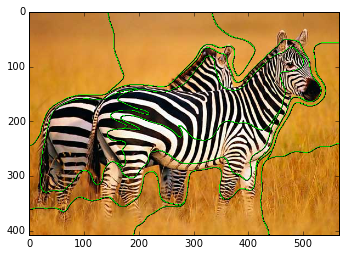

In [9]:
labels = slic(zebra, n_segments=10, enforce_connectivity=True, sigma = 0)
plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
plt.show()
labels = slic(zebra, n_segments=10, enforce_connectivity=True, sigma = 10.0)
plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
plt.show()

Пример неплохой сегментации

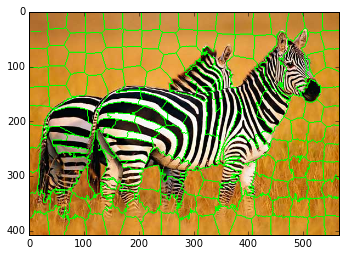

In [52]:
labels = slic(zebra, n_segments=200, compactness=20, enforce_connectivity=True)
plt.imshow(mark_boundaries(zebra, labels, (0, 1, 0)))
plt.show()

## 3

Свернем изображение с набором фильтров Габора.

In [53]:
filtered_images = []

for frequency in [1.0, 2.0, 4.0]:
    for theta in [0, pi/5, 2*pi/5, 3*pi/5, 4*pi/5]: # angles
        for color in range(3):
            real, img = gabor_filter(zebra[:,:,color], frequency, theta)
            filtered_images.append(real)

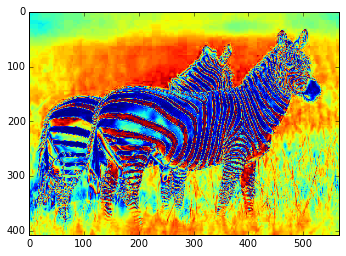

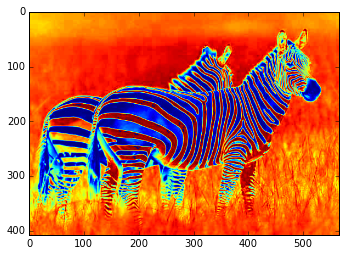

In [54]:
plt.imshow(filtered_images[15])
plt.figure()
plt.imshow(filtered_images[0])

вектор признаков для каждого суперпикселя:

In [55]:
X = []

for label in list(np.unique(good_labels)):
    pixels_cnt = sum(sum(good_labels == label))
    features = []
    for color in range(3):
        features.append(sum(sum(good_labels == label * zebra[:,:,color])) / float(pixels_cnt))
    for img in filtered_images:
        features.append(sum(sum(good_labels == label * img)) / float(pixels_cnt))
    X.append(features)
    
X = np.array(X)

In [56]:
X.shape

(150L, 48L)

## 4

Кластеризация:

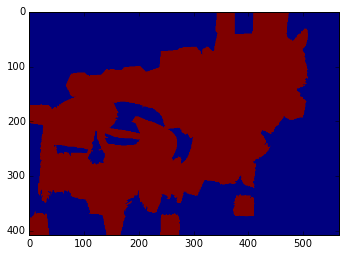

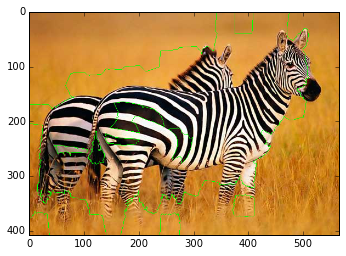

In [57]:
clust = KMeans(n_clusters=2).fit_predict(X)
plt.imshow(clust[good_labels])
plt.show()
plt.imshow(mark_boundaries(zebra, clust[good_labels], (0, 1, 0)))
plt.show()

## 5

Соберем все в одну функцию.

In [58]:
def process(image):
    good_labels = slic(image, n_segments=200, compactness=20, enforce_connectivity=True)
    
    filtered_images = []

    for frequency in [1.0, 2.0, 4.0]:
        for theta in [0, pi/5, 2*pi/5, 3*pi/5, 4*pi/5]:
            for color in range(3):
                real, img = gabor_filter(image[:,:,color], frequency, theta)
                filtered_images.append(real)
                
                
    X = []

    for label in list(np.unique(good_labels)):
        pixels_cnt = sum(sum(good_labels == label))
        features = []
        for color in range(3):
            features.append(sum(sum(good_labels == label * image[:,:,color])) / float(pixels_cnt))
        for img in filtered_images:
            features.append(sum(sum(good_labels == label * img)) / float(pixels_cnt))
        X.append(features)
    
    X = np.array(X)
    
    clust = KMeans(n_clusters=2).fit_predict(X)
    
    return clust[good_labels]

Другие картинки

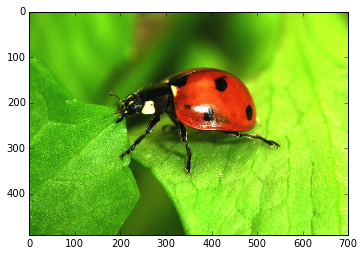

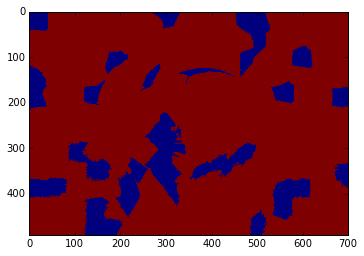

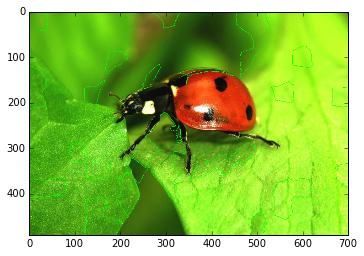

In [59]:
im = skimage.io.imread('bk.jpg')
plt.imshow(im)
plt.show()
c = process(im)
plt.imshow(c)
plt.show()
plt.imshow(mark_boundaries(im, c, (0, 1, 0)))
plt.show()

Результат в целом неудовлетворительный

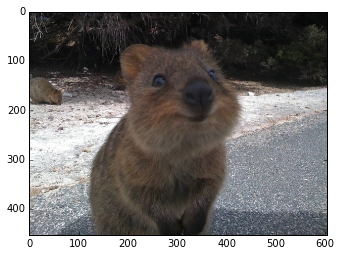

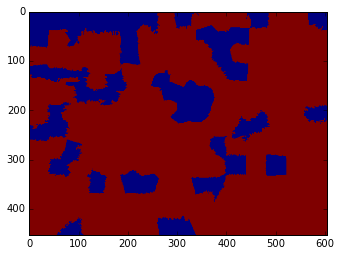

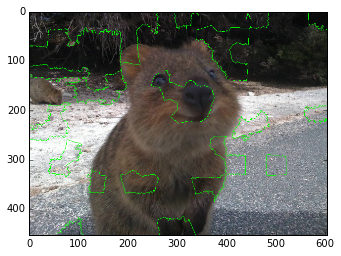

In [60]:
im = skimage.io.imread('kvokka.jpg')
plt.imshow(im)
plt.show()
c = process(im)
plt.imshow(c)
plt.show()
plt.imshow(mark_boundaries(im, c, (0, 1, 0)))
plt.show()